<h1 align=center> Mushroom Class Classification </h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from imblearn.over_sampling import RandomOverSampler,SMOTE

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
data.shape

(8124, 23)

In [4]:
pd.set_option('display.max_columns',23)
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [5]:
data.columns.unique()

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [6]:
data.rename(columns={'class':'Class'},inplace=True)

In [7]:
data

,Class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [8]:
le = LabelEncoder()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [10]:
for i in data.columns:
    if data[i].dtypes=='object':
        data[i] = le.fit_transform(data[i])

In [11]:
data

,Class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,0,2,1,0,7,4,2


In [12]:
data.duplicated().sum()

0

In [13]:
x = data.iloc[:,1:].values
y = data.iloc[:,0].values

In [14]:
sc = StandardScaler()

In [15]:
x = sc.fit_transform(x)

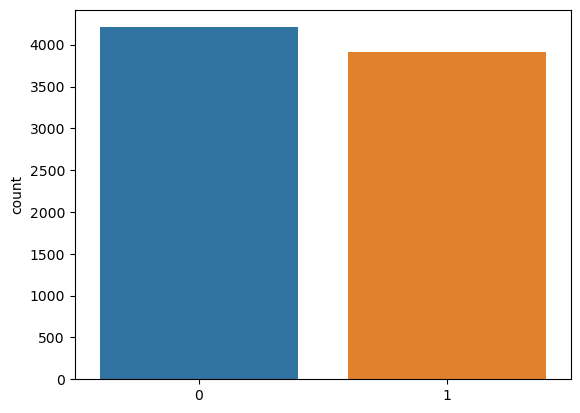

In [16]:
sns.countplot(x=y)
plt.show()

In [18]:
models = {"LogisticRegression":LogisticRegression(),
          "RandomForestClassifier":RandomForestClassifier(),
          "DecisionTreeClassifier":DecisionTreeClassifier(),
          "AdaBoostClassifier":AdaBoostClassifier(),
          "GradientBoostingClassifier":GradientBoostingClassifier(),
          "KNeighborsClassifier":KNeighborsClassifier()
    
}

In [20]:
for name,model in models.items():
    scores = cross_val_score(model,x,y,scoring="accuracy",cv=10,n_jobs=-1)
    print("Cross validation model:{}".format(name))
    print("Mean score:",np.mean(scores)*100)
    print("*"*100)

Cross validation model:LogisticRegression
Mean score: 88.75029538472725
****************************************************************************************************
Cross validation model:RandomForestClassifier
Mean score: 96.39550348705457
****************************************************************************************************
Cross validation model:DecisionTreeClassifier
Mean score: 96.4817103836063
****************************************************************************************************
Cross validation model:AdaBoostClassifier
Mean score: 95.016193142227
****************************************************************************************************
Cross validation model:GradientBoostingClassifier
Mean score: 96.55560200922207
****************************************************************************************************
Cross validation model:KNeighborsClassifier
Mean score: 95.10240003877873
************************************************

### selecting GradientBoostingClassifier

In [21]:
gbr = GradientBoostingClassifier()

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,shuffle=True,test_size=0.2)

In [23]:
model = GradientBoostingClassifier()

In [24]:
model.fit(x_train,y_train)

GradientBoostingClassifier()

In [25]:
print("Model trained with GradientBoostingClassifier")
train_score = accuracy_score(y_train,model.predict(x_train))
test_score = accuracy_score(y_test,model.predict(x_test))
train_conf = confusion_matrix(y_train,model.predict(x_train))
test_conf = confusion_matrix(y_test,model.predict(x_test))
print("Model accuracy on train is:",train_score)
print("Model accuracy on test is :",test_score)
print("confusion_matrix train is:",train_conf)
print("Confusion_matrix test is",test_conf)
print("wrong predictions made:",((y_test !=model.predict(x_test)).sum(),'/',
                                 ((y_test == model.predict(x_test)).sum()+
                                  (y_test != model.predict(x_test)).sum())))

Model trained with GradientBoostingClassifier
Model accuracy on train is: 1.0
Model accuracy on test is : 1.0
confusion_matrix train is: [[3365    0]
 [   0 3134]]
Confusion_matrix test is [[843   0]
 [  0 782]]
wrong predictions made: (0, '/', 1625)


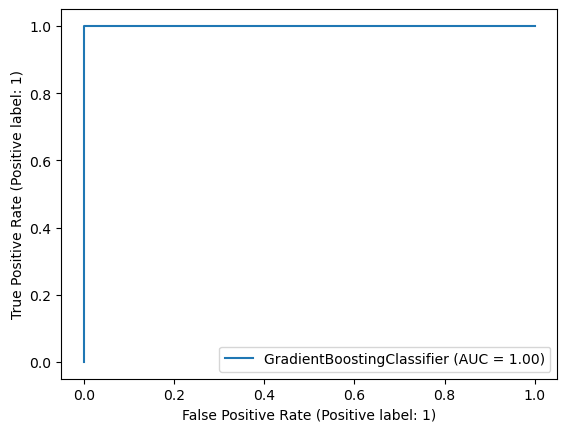

In [26]:
roc_display = RocCurveDisplay.from_estimator(model,x_test,y_test)